##### Among all of the business domains, HR is still the least disrupted. However, the latest developments in data collection and analysis tools and technologies allow for data driven decision-making in all dimensions, including HR. This course will provide a solid basis for dealing with employee data and developing a predictive model to analyze employee turnover.

In [ ]:
# Import pandas (as pd) to read the data
import pandas as pd

# Read "turnover.csv" and save it in a DataFrame called data
data = pd.read_csv("turnover_data.csv")

# Take a quick look to the first 5 rows of data
print(data.head())

# Get some information on the types of variables in data
data.info()

   satisfaction  evaluation  number_of_projects  average_montly_hours  \
0          0.38        0.53                   2                   157   
1          0.80        0.86                   5                   262   
2          0.11        0.88                   7                   272   
3          0.72        0.87                   5                   223   
4          0.37        0.52                   2                   159   

   time_spend_company  work_accident  churn  promotion department  salary  
0                   3              0      1          0      sales     low  
1                   6              0      1          0      sales  medium  
2                   4              0      1          0      sales  medium  
3                   5              0      1          0      sales     low  
4                   3              0      1          0      sales     low  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 column

In [ ]:
# Print the unique values of the "department" column
print(data["department"].unique())

# Print the unique values of the "salary" column
print(data["salary"].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


#### Preparing data for machine learning

In [ ]:
# Change the type of the "salary" column to categorical

data["salary"] = data["salary"].astype('category')

# Provide the correct order of categories
data["salary"] = data["salary"].cat.reorder_categories(["low", "medium", "high"])

# Encode categories
data["salary"] = data["salary"].cat.codes

In [ ]:
# Get dummies and save them inside a new DataFrame
departments = pd.get_dummies(data.department)

# Take a quick look to the first 5 rows of the new DataFrame called departments
print(departments.head())

   IT  RandD  accounting  hr  management  marketing  product_mng  sales  \
0   0      0           0   0           0          0            0      1   
1   0      0           0   0           0          0            0      1   
2   0      0           0   0           0          0            0      1   
3   0      0           0   0           0          0            0      1   
4   0      0           0   0           0          0            0      1   

   support  technical  
0        0          0  
1        0          0  
2        0          0  
3        0          0  
4        0          0  


In [ ]:
# Drop the "accounting" column to avoid "dummy trap"
departments = departments.drop("accounting", axis=1)

# Drop the old column "department" as you don't need it anymore
data = data.drop("department", axis=1)

# Join the new DataFrame "departments" to your employee dataset: done
data = data.join(departments)

#### Descriptive statistics

In [ ]:
# Use len() function to get the total number of observations and save it as the number of employees
n_employees = len(data)

# Print the number of employees who left/stayed
print(data["churn"].value_counts())

# Print the percentage of employees who left/stayed
print(data["churn"].value_counts()/n_employees*100)

0    11428
1     3571
Name: churn, dtype: int64
0    76.191746
1    23.808254
Name: churn, dtype: float64


In [ ]:
# Choose the dependent variable column (churn) and set it as target
y = data["churn"]

# Drop column churn and set everything else as features
X = data.drop("churn",axis=1)

In [ ]:
# Import the function for splitting dataset into train and test
from sklearn.model_selection import train_test_split

# Use that function to create the splits both for target and for features
# Set the test sample to be 25% of your observations
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### Computing Gini index
##### The decision tree algorithm aims to achieve partitions in the terminal nodes that are as pure as possible. The Gini index is one of the methods used to achieve this. It is calculated based on the proportion of samples in each group. Given the number of people who stayed and left respectively, calculate the Gini index for that node.

In [ ]:
#number of people who stayed/left
stayed = 37
left = 1138

#sum of stayed and left
total = stayed + left

#gini index
gini = 2*(stayed/total)*(left/total)

##### Given the Gini index that would result from splitting by either variable A or B, respectively, decide by which variable the tree should split next.

In [ ]:
# Gini index in case of splitting by variable A or B
gini_A = 0.65
gini_B = 0.15

# check which Gini is lower and use it for spliting
if gini_A < gini_B:
    print("split by A!")
else:
    print("split by B!")

split by B!


#### Fitting the tree to employee data
##### A train/test split provides the opportunity to develop the classifier on the training component and test it on the rest of the dataset. we will start developing an employee turnover prediction model using the decision tree classification algorithm. The algorithm provides a .fit() method, which can be used to fit the features to the model in the training set.

In [ ]:
# Import the classification algorithm
from sklearn.tree import DecisionTreeClassifier

# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42)

# Apply a decision tree model to fit features to the target
model.fit(X_train, y_train)

# Check the accuracy score of the prediction for the training set
print(model.score(X_train, y_train)*100)

# Check the accuracy score of the prediction for the test set
print(model.score(X_test, y_test)*100)

100.0
97.22666666666666


In [ ]:
# Import the graphical visualization export function
from sklearn.tree import export_graphviz

# Apply Decision Tree model to fit Features to the Target
model.fit(X_train, y_train)

# Export the tree to a dot file
export_graphviz(model,"tree.dot")

#### Pruning the tree
##### Overfitting is a classic problem in analytics, especially for the decision tree algorithm. Once the tree is fully grown, it may provide highly accurate predictions for the training sample, yet fail to be that accurate on the test set. For that reason, the growth of the decision tree is usually controlled by:

##### “Pruning” the tree and setting a limit on the maximum depth it can have. Limiting the minimum number of observations in one leaf of the tree.
##### i will try to prune the tree and limit the growth of the tree to 5 levels of depthfit it to the employee data test prediction results on both training and testing sets.

In [ ]:
# Initialize the DecisionTreeClassifier while limiting the depth of the tree to 5
model_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model
model_depth_5.fit(X_train, y_train)

# Print the accuracy of the prediction for the training set
print(model_depth_5.score(X_train, y_train)*100)

# Print the accuracy of the prediction for the test set
print(model_depth_5.score(X_test, y_test)*100)

97.71535247577563
97.06666666666666


#### Limiting the sample size
##### Another method to prevent overfitting is to specify the minimum number of observations necessary to grow a leaf (or node), in the Decision Tree.

##### In this step, i will:
##### set this minimum limit to 100 fit the new model to the employee data examine prediction results on both training and test sets

In [ ]:
# Initialize the DecisionTreeClassifier while limiting the sample size in leaves to 100
model_sample_100 = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)

# Fit the model
model_sample_100.fit(X_train, y_train)

# Print the accuracy of the prediction (in percentage points) for the training set
print(model_sample_100.score(X_train, y_train)*100)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_sample_100.score(X_test, y_test)*100)

96.57747355320473
96.13333333333334


#### Calculating accuracy metrics: precision
##### The Precision score is an important metric used to measure the accuracy of a classification algorithm. It is calculated as the fraction of True Positives over the sum of True Positives and False Positives, or
 
##### we define True Positives as the number of employees who actually left, and were classified correctly as leaving we define False Positives as the number of employees who actually stayed, but were wrongly classified as leaving If there are no False Positives, the precision score is equal to 1. If there are no True Positives, the precision score is equal to 0.

##### I will calculate the precision score (using the sklearn function precision_score) for our initial classification model.

In [ ]:
# Import the function to calculate precision score
from sklearn.metrics import precision_score

# Predict whether employees will churn using the test set
prediction = model.predict(X_test)

# Calculate precision score by comparing target_test with the prediction
precision_score(y_test, prediction)

0.9240641711229947

#### Calculating accuracy metrics: recall
##### The Recall score is another important metric used to measure the accuracy of a classification algorithm. It is calculated as the** fraction of True Positives over the sum of True Positives and False Negatives**, or If there are no False Negatives, the recall score is equal to 1. If there are no True Positives, the recall score is equal to 0.

##### In this step, i will calculate the recall score (using the sklearn function recall_score) for your initial classification model.

In [ ]:
# Import the function to calculate recall score
from sklearn.metrics import recall_score

# Use the initial model to predict churn
prediction = model.predict(X_test)

# Calculate recall score by comparing target_test with the prediction
recall_score(y_test, prediction)

0.9632107023411371

#### Calculating the ROC/AUC score
##### While the Recall score is an important metric for measuring the accuracy of a classification algorithm, it puts too much weight on the number of False Negatives. On the other hand, Precision is concentrated on the number of False Positives. The combination of those two results in the ROC curve allows us to measure both recall and precision. The area under the ROC curve is calculated as the AUC score.

##### I will calculate the ROC/AUC score for the initial model using the sklearn roc_auc_score() function.

In [ ]:
# Import the function to calculate ROC/AUC score
from sklearn.metrics import roc_auc_score

# Use initial model to predict churn (based on features_test)
prediction = model.predict(X_test)

# Calculate ROC/AUC score by comparing target_test with the prediction
roc_auc_score(y_test, prediction)

0.9691623087590718

#### Balancing classes
##### It can significantly affect prediction results, as shown by the difference between the recall and accuracy scores. To solve the imbalance, equal weights are usually given to each class. Using the class_weight argument in sklearn's DecisionTreeClassifier, one can make the classes become "balanced".

##### Let’s correct our model by solving its imbalance problem: first, i'm going to set up a model with balanced classes then, you will fit it to the training data finally, you will check its accuracy on the test set

In [ ]:
# Initialize the DecisionTreeClassifier 
model_depth_5_b = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=42)

# Fit the model
model_depth_5_b.fit(X_train, y_train)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_depth_5_b.score(X_test, y_test)*100)

93.70666666666668


#### Comparison of Employee attrition models
##### my task here is to compare the balanced and imbalanced (default) models using the pruned tree (max_depth=7). The imbalanced model is already done using recall and ROC/AUC scores. Complete the same steps for the balanced model.
##### The variables X_train, y_train, X_test and y_test are already available in my workspace. An imbalanced model has already been fit for you and, and its predictions saved as prediction.
##### The functions recall_score() and roc_auc_score() have been imported for you.

In [ ]:
# Print the recall score
print(recall_score(y_test,prediction))
# Print the ROC/AUC score
print(roc_auc_score(y_test,prediction))

# Initialize the model
model_depth_7_b = DecisionTreeClassifier(max_depth=7,class_weight="balanced",random_state=42)

# Fit it to the training component
model_depth_7_b.fit(X_train, y_train)
# Make prediction using test component
prediction_b = model_depth_7_b.predict(X_test)
# Print the recall score for the balanced model
print(recall_score(y_test, prediction_b))
# Print the ROC/AUC score for the balanced model
print(roc_auc_score(y_test, prediction_b))

0.9632107023411371
0.9691623087590718
0.9319955406911928
0.959863876199084


#### Cross-validation using sklearn:
##### overfitting the dataset is a common problem in analytics. This happens when a model has learned the data too closely: it has great performances on the dataset it was trained on, but fails to generalize outside of it. 
##### While the train/test split technique ensures that the model does not overfit the training set, hyperparameter tuning may result in overfitting the test component, since it consists in tuning the model to get the best prediction results on the test set. Therefore, it is recommended to validate the model on different testing sets. K-fold cross-validation allows us to achieve this:
##### it splits the dataset into a training set and a testing set it fits the model, makes predictions and calculates a score (you can specify if you want the accuracy, precision, recall…) it repeats the process k times in total it outputs the average of the 10 scores.

In [ ]:
# Import the function for implementing cross validation
from sklearn.model_selection import cross_val_score

# Use that function to print the cross validation score for 10 folds
print(cross_val_score(model, X, y,cv=10))

[0.98533333 0.98533333 0.974      0.96533333 0.96       0.97933333
 0.99       0.99333333 1.         1.        ]


#### Setting up GridSearch parameters
##### A hyperparameter is a parameter inside a function. For example, max_depth or min_samples_leaf are hyperparameters of the DecisionTreeClassifier() function. Hyperparameter tuning is the process of testing different values of hyperparameters to find the optimal ones: the one that gives the best predictions according to your objectives. In sklearn, you can use GridSearch to test different combinations of hyperparameters. Even better, you can use GridSearchCV() to test different combinations and run cross-validation on them in one function!

##### I'm going to prepare the different values you want to test for max_depth and min_samples_leaf. You will then put these in a dictionary, because that’s what is required for GridSearchCV():

##### the dictionary keys will be the hyperparameters names
##### the dictionary values will be the attributes (the hyperparameter values) you want to test Instead of writing all the values manually, you will use the range() function, which allows us to generate values incrementally. For example, range(1, 10, 2) will generate a list containing values ranging from 1 included to 10 not included, by increments of 2. So the final result will be [1, 3, 5, 7, 9].

In [ ]:
# Generate values for maximum depth
depth = [i for i in range(5,21,1)]

# Generate values for minimum sample size
samples = [i for i in range(50,500,50)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

#### Implementing GridSearch

In [ ]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# set up parameters: done
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters, cv=3)

# fit the param_search to the training dataset
param_search.fit(X_train, y_train)

# print the best parameters found
print(param_search.best_params_)

# obtaining the best model

best_model = param_search.best_estimator_

{'max_depth': 5, 'min_samples_leaf': 50}


#### Sorting important features
##### Among other things, Decision Trees are very popular because of their interpretability. Many models can provide accurate predictions, but Decision Trees can also quantify the effect of the different features on the target. Here, it can tell you which features have the strongest and weakest impacts on the decision to leave the company. In sklearn, you can get this information by using the feature_importances_ attribute.
##### I'm going to get the quantified importance of each feature, save them in a pandas DataFrame (a Pythonic table), and sort them from the most important to the less important.

In [ ]:
# Calculate feature importances
feature_importances = best_model.feature_importances_

# Create a list of features: done
feature_list = list(X)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction,0.551529
time_spend_company,0.157009
evaluation,0.144354
number_of_projects,0.092864
average_montly_hours,0.053087
technical,0.000631
hr,0.000295
salary,0.000231
promotion,0.000000
work_accident,0.000000


#### Selecting important features
##### In this exercise, your task is to select only the most important features that will be used by the final model. Remember, that the relative importances are saved in the column importance of the DataFrame called relative_importances.

In [ ]:
# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
features_train_selected = X_train[selected_list]
features_test_selected = X_test[selected_list]

#### Develop and test the best model
##### I found out that the following parameters allow me to get better model:
##### max_depth = 8,
##### min_samples_leaf = 150,
##### class_weight = "balanced"
##### I discovered that some of the features have a negligible impact. I realized that i could get accurate predictions using just a small number of selected, impactful features and i updated my training and testing set accordingly, creating the variables **X_train_selected** and **X_test_selected**.
##### With all this information at my disposal, i'm now going to develop the best model for predicting employee turnover and evaluate it using the appropriate metrics.

In [ ]:
X_selected = data[["satisfaction", "evaluation", "number_of_projects" ,"average_montly_hours", "time_spend_company"]]
y_selected = data["churn"]

In [ ]:
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.25, random_state=42)

In [ ]:
# Initialize the best model using parameters provided in description
model_best = DecisionTreeClassifier(max_depth=8, min_samples_leaf=150, class_weight="balanced", random_state=42)

# Fit the model using only selected features from training set: done
model_best.fit(X_train_selected, y_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best.predict(X_test_selected)

# Print the general accuracy of the model_best
print(model_best.score(X_test_selected, y_test) * 100)

# Print the recall score of the model predictions
print(recall_score(y_test, prediction_best) * 100)

# Print the ROC/AUC score of the model predictions
print(roc_auc_score(y_test, prediction_best) * 100)

95.28
91.75027870680044
94.07002193314084


KeyError: ignored

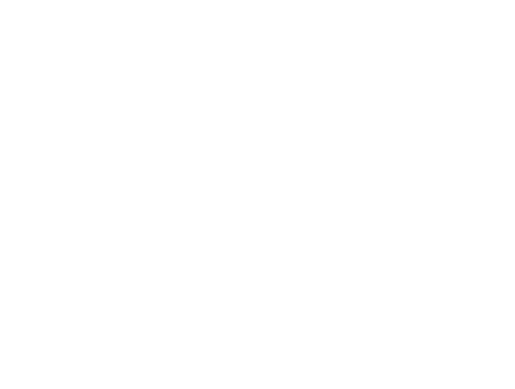

In [ ]:
from sklearn.tree import plot_tree, export_text
plot_tree(model_best, feature_names=X_selected, class_names=y, filled=True)